In [1]:
# ENTER YOUR NAME AND STUDENT NUMBER HERE
# TZU-HAN LIN 1905667

# Coursework Assignment  
# DUE on KEATS on Monday 9th of December, by 2355 (GMT)

- This is worth 10% of your final grade
- There are five parts to this assignment and the breakdown of the points is at the end of the .ipynb notebook.
- You should complete all answer cells in the iPython notebook (.ipynb), and submit the completed notebook on Keats.
- Use the specified file names for each of the scripts - marks will be deducted for not following these instructions
- You must do and submit your own work, there is no collaborating and no group work allowed on this module. Submissions will be evaluated using a software similarity plagarism checker. This checker is able to detect if code has been shared, even if it has been modified in an attempt to evade it (e.g. variable name changes, structural changes, etc). The penalties for plagarism are very strict, and may result in failing the module.
- Make sure that you properly comment your code, so that the person marking this can understand what your program is doing. Uncommented or poorly commented code will result in mark deductions.


Notes: 
1. For each of the below questions, please provide code in the indicated cells. 
2. Read over the coursework instructions fully before starting. Please read each part carefully, as there may be multiple subquestions contained within each part.

# The Data

The data for this assignment is on Keats as a .zip file. Download the .zip file and unpack it to a **data/** directory. The **data/** directory should be in the same directory as your python scripts.

(In spyder make sure the environment is pointing to this directory). Make sure that your python
scripts read input data files and write output data files to the **data/** directory. Any files that are
output elsewhere will not be graded

# Overview

This coursework will have you working with XML, CSV, and JSON files with data related to a Pizza Shop! Your scripts will read and write data files, and a set of sample of input and output files are provided for you as an example of the format of the expected output.

## Part 1: Pizza Menu

The "CMP Pizza Shop", has menu options stored in an XML data file, called **pizza.xml**. You will find the menu in the **pizza.xml** file in the **data.zip** provided with this Coursework.

The **pizza.xml** file includes the following information:

- the name of the pizza shop
- the sizes of the pizzas
- the toppings available
- the different crusts

Here is an example menu in xml, for illustrative purposes (note that the pizza.xml file provided in the data.zip archive, might be different from this example):

    <pizza>
    	<shopname>CMP Pizza Shop</shopname>
    	<sizes>
    		<size code="L">Large</size>
    		<size code="XL">Extra Large</size>
    	</sizes>
    	<toppings>
    		<topping code="x">Extra Cheese</topping>
    		<topping code="m">Mushrooms</topping>
    	</toppings>
    	<crusts>
    		<crust code="thick">Thick Crust</crust>
    	</crusts>
    </pizza>

### Question 1 (a)

Write python code in the below indicated cell, that reads in the **pizza.xml** file (located in data.zip), as an input using **xml.etree.ElementTree module**. (See lecture 2 and lab 2). Make sure you implement exception handling.

### Question 1 (b)

Using the ElementTree structure, print a human readable menu of pizza options for the pizza shop. This must include the pizza shop name, the pizza sizes, toppings, and crust options. For example, a human readable menu might look like the below:

        CMP Pizza Shop
        Sizes
        - Large
        - Extra Large

        Toppings
        - Extra Cheese
        - Mushrooms

        Crusts
        - Thick Crust


In [2]:
# Enter your code for Part 1 here
#(a)
import xml.etree.ElementTree as et
try:
    #use ElementTree open 'pizza.xml' file
    tree = et.ElementTree(file='data/pizza.xml') 
    #use getroot() function to find data in ElementTree
    root = tree.getroot() 
#exception handling
except IOError as ioe: 
    print('IOError : ' + str(ioe)) 

#(b)
#because shopname in first place of root, select particularly it for the menu title
print('%s' %root[0].text.strip())
#print out other places of root
for child in root: 
    #make sure it would not print out 'shopname'
    if child.tag != 'shopname': 
        #tag is the name of different category
        print('\n%s' %(child.tag)) 
    #content of each category is child of each tag, so it is defined grchild
    for grchild in child: 
        print('- %s' %(grchild.text.strip()))

CMP Pizza Shop

sizes
- Extra Small
- Small
- Medium
- Large
- Extra Large

toppings
- Chilli
- Mushrooms
- Extra Cheese

crusts
- Thin Crust
- Thick Crust
- Cheesy Crust
- Tomato Crust


## Part 2: Pizza Report

Using the datastructure created in **Part 1** of this coursework, write a program in the below indicated space that calculates the following:

### Question 2 (a)

1. The number of pizza sizes that are available from our pizza menu
2. The number of toppings that are available in the pizza menu
3. The number of crust options available in the pizza menu
4. The total number of combinations of **different** pizzas that can be assembled from this menu. 

Assume the following about each pizza:
	
- a pizza can only be one size (one pizza cannot be large and extra large at the same time)
- a pizza can have any combinations of toppings, including none, one or all
- a pizza can only have one type of crust (i.e. either thick or thin crust)

Print the output of each calculation, along with a string denoting the value. For example

    Number of pizza sizes = 2
    Number of toppings = ...
    ...

### Question 2 (b)

After printing these calculations, use the python CSV module to output your calculations as a single row of data to a CSV file with the name **pizza_report.csv**. Assume the following header for your CSV file along with the calculated numbers from the previous example:

    sizes,toppings,crusts,total_combo  

### Question 2 (c)

After writing the report, re-open the file **pizza_report.csv**, and print each line of the file to the notebook.

In [2]:
# Enter your code for Part 2 here
#a
#count child in each tag
for child in root: 
    if len(child) != 0:
        print('Number of pizza %s = %d' % (child.tag,len(child)))

#count len of child in sizes, toppings and crusts
for child in root:
    if child.tag == 'sizes':
        sizes = len(child)
    elif child.tag == 'toppings':
        toppings = len(child)
    else:
        crusts = len(child)

#use amount of sizes, toppings and crusts, count number of possible combinations
total_combo = sizes*(2**toppings)*crusts
print('Number of pizza combinations = %d' %total_combo)

#b
#use csv.writer open pizza_report.csv
import csv
with open('data/pizza_report.csv','w') as file:
    pizza_writer = csv.writer(file,delimiter=',',quotechar='"')
    #create a list in order to combine each column name in csv
    pizza_list = []
    for child in root:
        #except 'shopname'
        if len(child) != 0: 
            pizza_list.append(child.tag)
    #column 'total_combo' should add manually
    pizza_list.append('total_combo')
    #write column name into file
    pizza_writer.writerow(pizza_list)
    #write values into file
    pizza_writer.writerow([sizes, toppings, crusts, total_combo]) 
    file.close()

#c
#read csv file what we write befor
with open('data/pizza_report.csv','r') as file:
    pizza=csv.reader(file)
    #print as list of list
    pizza_menu=list(pizza) 
    print(pizza_menu)
    file.close()
    

Number of pizza sizes = 5
Number of pizza toppings = 3
Number of pizza crusts = 4
Number of pizza combinations = 160
[['sizes', 'toppings', 'crusts', 'total_combo'], ['5', '3', '4', '160']]


## Part 3: Pizza Specials


In addition to the standard menu, the CMP pizza shop also stores **Pizza Specials** in a file **pizza_specials.csv**, with the following format:

    name,size,toppings,crust  
    Supreme,XL,xm,thick  
    Simple Cheese,L,x,thick


Every pizza special has a name, a size, a combination of toppings, and a crust. The size, toppings, and crust are referenced by a code attribute, which is specified in the pizza.xml XML file. For example, the topping code for Mushrooms is "m", and the topping code for Extra Cheese is "x". The Supreme pizza has both Mushrooms and Extra Cheese as designated by the string "xm". 

### Part 3 (a)

Write code in the answer cell below, that reads in the pizza.xml file (again using the xml.etree.ElementTree module) and stores the sizes, toppings, and crusts in dictionaries with the code for that element as the key and the text for the element as the value.

### Part 3 (b)

Using these dictionaries, read in the Pizza Specials from the pizza_specials.csv file and convert them to a menu text description. 

### Part 3 (c)

Write code to output each special's menu description as a human readable line in a text file called **pizza_specials.txt**. For example, the Supreme special would be output in the txt file as:

        Supreme: Extra Large Pizza with Extra Cheese and Mushrooms and Thick Crust 
   
### Part 3 (d)

After writing the pizza Specials, re-open the file **pizza_specials.txt**, and print each line of the file to the notebook.

In [5]:
# Enter your code for Part 3 here
#a
import xml.etree.ElementTree as et
tree = et.ElementTree(file='data/pizza.xml')
root = tree.getroot()

pizza_list=[] #use pizza_list collect code 
for child in root:
    for grchild in child:
        #left part: 'code' is in attrib of grchild, using dictionary. And make it be the key for dictionary which we want to create
        #right part: let text of grchild become a list of values for dictionary which we want to create
        pizza_d=(grchild.attrib['code'], grchild.text.strip()) 
        #put values we find out by 'code' key in a list
        pizza_list.append(pizza_d) 

pizza_dict=dict(pizza_list) #make above list become dictionary

#b
with open('data/pizza_specials.csv','r') as file:
    #use DicReader to read csv file as dictionary
    special_pizza = csv.DictReader(file)  
    for i in special_pizza:
        #use 'size' key read pizza's size, and find complete name in pizza_dict
        s=pizza_dict[i['size']] 
        #use 'crust' key read pizza's crust, and find complete name in pizza_dict
        c=pizza_dict[i['crust']] 
        #condition: no toppings
        if len(i['toppings']) == 0: 
            #just print pizza's name, size and crust type
            print('%s, %s, %s' %(i['name'], s, c)) 
        #condition: 1 topping
        elif len(i['toppings']) == 1:
            #use 'toppings' key read pizza's topping, and find complete name in pizza_dict
            t=pizza_dict[i['toppings']] 
            #print pizza's name, size, topping and crust type
            print('%s, %s, %s, %s' % (i['name'], s, t, c))
        #condition: more than 1 topping
        else:
            #create a topping list
            t=[] 
            #make file's values by 'toppings' key to find each word 
            for k in list(i['toppings']): 
                #find its complete name k
                k=pizza_dict[k]  
                #append each complete name into list t
                t.append(k) 
            #(first)print pizza's name and size
            print('%s, %s, ' %(i['name'],s), end = '') 
            #(second)print criteria in list t, need print them out side by side
            print(*t, sep = ", ", end = '') 
            #(third)print pizza's crust
            print(', %s'%c) 


#c 
with open('data/pizza_specials.csv','r') as file:
    special_pizza = csv.DictReader(file)
    
    #use a list to contain special menu information
    special_list = [] 
    for i in special_pizza:
        s=pizza_dict[i['size']]
        c=pizza_dict[i['crust']]
        #information of name and size that we want to print on menu
        special_list.extend((i['name'] + ': ', s + ' Pizza with ') )
        if len(i['toppings']) == 0:
            #information of toppings that we want to print on menu (when no toppings)
            special_list.append(c)
        elif len(i['toppings']) == 1:
            t=pizza_dict[i['toppings']]
            #information of toppings that we want to print on menu (when 1 topping)
            special_list.extend((t + ' and ', c))
        else:
            for k in list(i['toppings']):
                k = pizza_dict[k]
                #information of toppings that we want to print on menu (when more than 1 toppings)
                special_list.append(k + ' and ')
            #information of crust that we want to print on menu
            special_list.append(c)

file = open('data/pizza_specials.txt','w')
#write special pizza into pizza special text file
for i in special_list:
    if i.endswith('Crust'):
        file.writelines(i + ' \n')
    else:
        file.write(i)
file.close()

#d
#read text file
file = open('data/pizza_specials.txt','r')
a = file.readlines()
for i in a:
    print(i, end='')

Supreme, Extra Large, Extra Cheese, Mushrooms, Thick Crust
Simple Cheese, Large, Extra Cheese, Thick Crust
Supreme: Extra Large Pizza with Extra Cheese and Mushrooms and Thick Crust 
Simple Cheese: Large Pizza with Extra Cheese and Thick Crust 


## Part 4: Pizza Decider


**Who should get a pizza?** 

This part of the coursework will use a data set collected from the Reddit group **"Random Acts of Pizza"** (https://www.reddit.com/r/Random_Acts_Of_Pizza/). Random Acts of Pizza is a community on the website Reddit.com that facilitates the sending and receiving of pizzas between strangers. People write a request for a pizza on the Reddit group and someone may accept their request and order them a pizza!

(a version of this data is also available on Kaggle)

A data set has been collated for the textual requests to this Reddit Group. A simplified excerpt of the requests to /r/Random_Acts_of_Pizza has been provided in the text file **random_acts_pizza.csv**. There are 4 columns in this CSV file:

- requester_username - the name of the user requesting pizza
- request_text - the text of the pizza request written by the user
- requester_received_pizza - a Boolean whether or not the pizza request was accepted
- requester_account_age_in_days_at_request - the age of the reddit user account, measured at the time the user made the request

In this question, you will need to write code that will use this the random_acts_pizza.csv file to automate the decision as to whether a new request for pizza should be accepted or not.

### Part 4 (a)

Using the csv python module, read in the "Random Acts of Pizza" request history that is contained in the **random_acts_pizza.csv** file.  Add a class called PizzaDecider to your program, which uses the request history to output a boolean value, deciding whether or not a new request for pizza should be accepted. This decision is based according to the following criteria:

1) The user requesting a new pizza (identified by their username) has **not previously received** a pizza from the "Random Acts of Pizza" group.
2) The text of the user's pizza request is longer than **400 characters** in length.

### Part 4 (b)

After you have created the PizzaDecider class, use the json python module to have your program read in a file called pizza_request.json, which contains one request for pizza. The request file is a dictionary which has two keys:  
-- requester_username - the name of the user requesting pizza
-- request_text - the text of the pizza request written by the user

For an example pizza request see the file, **pizza_request.json** in the data.zip.

Your program will pass the pizza request read in from the pizza_request.json file, to a method in the PizzaDecider class that will return a boolean whether or not the user should get a pizza according to the criteria above.

### Part 4 (c)

Your program should now write out the decision from the PizzaDecider to a new JSON file called pizza_decision.json which is a dictionary with the following keys: 
- requester_username - the name of the user requesting pizza
- request_text - the text of the pizza request written by the user
- receive_pizza - a Boolean, stating whether or not the pizza request should be accepted according to the criteria

For an example of the expected output, see the file **pizza_decision.json** in the data.zip, for the pizza decision from the **pizza_request.json** example mentioned earlier.

### Part 4 (d)
Print to the notebook the decision for the user given in **pizza_decision.json**. For example,
        
        User: "spez" request for pizza should not be accepted.

In [9]:
# Enter your code for Part 4 here

#a
import csv
file = open('data/random_acts_pizza.csv','r')
pizza = csv.reader(file)
pizza = list(pizza)

#create a class to classify username and text
class PizzaDecider():
    def __init__(self, requester_username, request_text):
        self.requester_username = requester_username
        self.request_text = request_text
    
    #use a function inside class, to make sure the order we return is suitable
    def decider(self):
        for i in pizza:
            if self.requester_username in i:
                #2 condition: not TRUE & text length <= 400
                if i[2] == 'TRUE' and len(i[0]) > 400:
                    return False
                else:
                    return True

#b
import json
with open('data/pizza_request.json','r') as file:
    pizza_order = json.load(file)

#use class to classify new order
new_order = PizzaDecider(pizza_order['requester_username'], pizza_order['request_text'])
#use function to recognise order is under condition or not
new_order = PizzaDecider.decider(new_order)


#c
#return variable 'receive_pizza'
if new_order == True :
    receive_pizza = True
elif new_order == False :
    receive_pizza = False
#key: column name & values: from new orders, and create from previous function
result = dict({'requester_username' : pizza_order['requester_username']\
               , 'request_text' : pizza_order['request_text'], 'receive_pizza' : receive_pizza})

#write decesion into jason file
with open('data/pizza_decision.json','w') as outfile:
    json.dump(result, outfile) 
    
#d
#read json file which we just create
with open('data/pizza_decision.json','r') as file:
    pizza_decision = json.load(file)
    pizza_result=pizza_decision['receive_pizza']
    #use values in 'receive_pizza' column to print a message that can tell request should be accepted or not
    if pizza_result == 'True':
        print('User: "%s" request for pizza should be accepted.' %pizza_decision['requester_username'])
    else:
        print('User: "%s" request for pizza should not be accepted.' %pizza_decision['requester_username'])
    

User: "anyquestions" request for pizza should not be accepted.


## Part 5: Visualing Pizza data

For this final part of the coursework, you will use statistical visualisation techniques you have covered in the module, to help explore the data. This question will use the **random_acts_pizza.csv** file from the previous question.


Using the **random_acts_pizza.csv** file, create a figure containing a subplot, with two rows, and two columns. Plot the following diagrams using **seaborn** library in the subplots.
1. A distplot of the account age at the time of request (**requester_account_age_in_days_at_request**) 
2. A boxplot, where the x-axis (the catagory) is if the request was fullfilled or not (**requester_received_pizza**), and the y-axis is the lenth of the request string (the length of **request_text**)
3. A violin plot, where the x-axis (the catagory) is if the request was fullfilled or not (**requester_received_pizza**), and the y-axis is the number of times the string **pizza** is counted in **request_text**
4. Using either **matplotlib** or **seaborn**, create a 2D scatterplot, where the x-axis is the account age, the y-axis is the length of the request, and the marker color if different depending on if the request was fullfilled (**requester_received_pizza**)

Remember to label axes, and choose appropriate informative titles for the plots.

Text(0.5, 1.0, 'Account Age & Text Length')

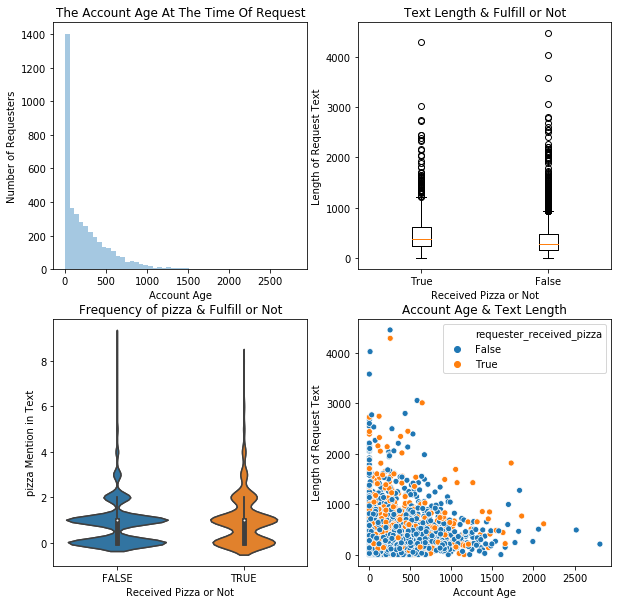

In [10]:
# Enter your code for Part 5 here
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

with open('data/random_acts_pizza.csv','r') as file:
    fd=csv.reader(file)
    acts_pizza=list(fd)
    #remove column title
    acts_pizza.pop(0)

#change to array      
acc_pizza=np.array(acts_pizza)
#modify of figure size
plt.figure(figsize=(10,10))

#1
#first subplot in 2 row & 2 column plot
plt.subplot(2,2,1)
#just select values in second column (requester_account_age_in_days_at_request)
acc_age=acc_pizza[:,1]
#change type to float
act_age=acc_age.astype(np.float)

#use displot display account age distribution (include kde line and histogram)
ax1 = sns.distplot(act_age,kde=False, hist=True)
ax1.set_title("The Account Age At The Time Of Request")
ax1.set_xlabel("Account Age")
ax1.set_ylabel("Number of Requesters")

#2
#second subplot in 2 row & 2 column plot
plt.subplot(2,2,2)
#ust select values in first column (request_text)
text=acc_pizza[:,0]
#ust select values in third column (requester_received_pizza)
fulfill=acc_pizza[:,2]

#use for contain the text length which request already be fullfiled
req_true=[]
#use for contain the text length which request not be fullfiled
req_false=[]

for i in range(0,len(fulfill)):
    #if 'i'th 'requester_received_pizza' is TRUE
    if fulfill[i] == "TRUE":
        l = len(text[i])
        #then add length of text from 'i'th request_text to list
        req_true.append(l)
    #if 'i'th 'requester_received_pizza' is FALSE
    elif fulfill[i] == 'FALSE':
        l = len(text[i])
        #then add length of text from 'i'th request_text to list
        req_false.append(l)
#use data in these 2 list for making 2 boxplots
ax2=plt.boxplot([req_true,req_false])
#tick name at right place
plt.xticks([1, 2], ['True','False'])
plt.xlabel('Received Pizza or Not')
plt.ylabel('Length of Request Text')
plt.title('Text Length & Fulfill or Not')

#3
#third subplot in 2 row & 2 column plot
plt.subplot(2,2,3)
#creat a list 'pizza_count' to contain the result of calculation
pizza_count = []
#detect each text in 
for i in text:
    #calculate amount of word 'pizza' in each text
    p = i.count("pizza")
    #let every calculation append to new list orderly
    pizza_count.append(p)
#plot violinplot 
ax3 = sns.violinplot(x=fulfill, y=pizza_count)
#ax3.set_xlabel("Received Pizza or Not")
#ax3.set_ylabel("'pizza' Mention in Text")
#ax3.set_title('Frequency of pizza & Fulfill or Not ')
for_ax3={'title':'Frequency of pizza & Fulfill or Not','xlabel':'Received Pizza or Not','ylabel':'pizza Mention in Text'}
ax3.set(**for_ax3)

#4
#forth subplot in 2 row & 2 column plot
plt.subplot(2,2,4)
#open file by pandas
data = pd.read_csv('data/random_acts_pizza.csv')
#make data become dataframe format
df = pd.DataFrame(data)

#create new list to count length of text
text_len=[]
for i in text:
    text_len.append(len(i))

#add new column, which values contain length of text
df['Length']=text_len
#use position of point display relation between 'account age' and 'text length'
#use color display 'receive pizza or not', there are 2 kinds of result (True & False)
ax4 = sns.scatterplot(x="requester_account_age_in_days_at_request", y="Length",hue="requester_received_pizza", data=df)
ax4.set_xlabel("Account Age")
ax4.set_ylabel("Length of Request Text")
ax4.set_title('Account Age & Text Length')


# What to submit on Keats

For this coursework you will complete all the answer cells a shown above in this iPython Notebook.
The header of this notebook should contain your **name** and your **student number**.

Put this file, as well as any data files that have been generated as outputs for the questions above, into a **.zip** file, and upload to the indicated folder on Keats.

# Point Breakdown

The coursework will be marked out of 100 points, as follows:

- Part 1: 30 Marks
- Part 2: 20 Marks
- Part 3: 20 Marks
- Part 4: 20 Marks
- Part 5: 10 Marks

For each of the parts of the coursework marks are awarded for:
- code that runs and performs all tasks as laid out in the assignment
- appropriate use of functions and clear code layout
- well commented code

**This ASSIGNMENT is worth 10% of your mark for this module.**

# College Policy on Late Submissions

- Submissions uploaded within 24 hours of the deadline will be marked no higher than 40%
- Submissions uploaded after 24 hours of the deadline will be marked 0, unless mitigating circumstances occur.
- A mitigating circumstances form must be filed in the Informatics department office. See http://www.kcl.ac.uk/mitcircs for more details.